# Aggregate Historical + Predicted Data


In [4]:
import pandas as pd

# Load your data
df = pd.read_csv("traffic_data.csv")  # Replace with your dataset path

# Convert to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Aggregate daily average traffic volume
daily_volume = df.set_index('date_time')['traffic_volume'].resample('D').mean().reset_index()

print(daily_volume.head())



   date_time  traffic_volume
0 2012-10-02     4219.266667
1 2012-10-03     3317.250000
2 2012-10-04     3747.458333
3 2012-10-05     4242.545455
4 2012-10-06     3256.956522


# Simulate Future Traffic Patterns

In [6]:
import pandas as pd
import joblib

# Load your trained model and feature columns list
model = joblib.load("traffic_model.pkl")
feature_cols = joblib.load("feature_columns.pkl")

future_predictions = []

for day in range(1, 31):
    # Create a dictionary for simulated features for each future day
    feature_dict = {
        'hour': 8,                # peak morning hour
        'day': day,
        'month': 7,               # example: July
        'day_of_week': (day + 1) % 7,  # adjust for weekday
        'is_weekend': int(((day + 1) % 7) in [5, 6]),
        'temp': 295,
        'rain_1h': 0.0,
        'snow_1h': 0.0,
        'clouds_all': 20,
        'holiday_Independence Day': 1 if day == 4 else 0,
        'weather_main_Clear': 1,
        # Include other holiday/weather one-hot features as 0 by default
    }
    
    # Initialize DataFrame with zeroes for all features
    input_df = pd.DataFrame(columns=feature_cols)
    input_df.loc[0] = [0] * len(feature_cols)
    
    # Fill in feature_dict values where columns exist
    for key, val in feature_dict.items():
        if key in input_df.columns:
            input_df.at[0, key] = input_df[key].dtype.type(val)
    
    # Predict traffic volume
    pred_volume = model.predict(input_df)[0]
    future_predictions.append({'day': day, 'predicted_volume': pred_volume})

# Convert to DataFrame
future_df = pd.DataFrame(future_predictions)

print(future_df.head())



   day  predicted_volume
0    1           5399.46
1    2           5178.64
2    3           4653.57
3    4           2292.04
4    5           1700.25


# Visualize Traffic Trends Over Time

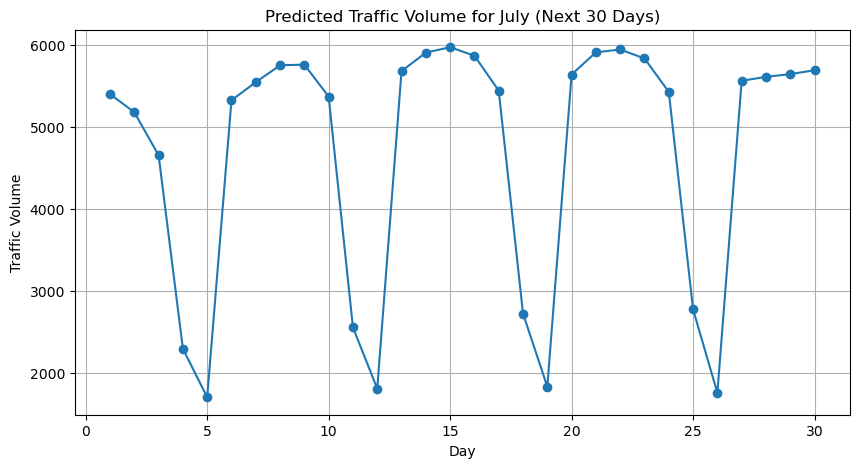

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(future_df['day'], future_df['predicted_volume'], marker='o')
plt.title('Predicted Traffic Volume for July (Next 30 Days)')
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


# Generate Urban Planning Insights & Reports

In [11]:
import pandas as pd
def traffic_level(volume):
    if volume > 4000:
        return 'High'
    elif volume > 2000:
        return 'Medium'
    else:
        return 'Low'

future_df['traffic_level'] = future_df['predicted_volume'].apply(traffic_level)
summary = future_df.groupby('traffic_level')['predicted_volume'].agg(['count', 'mean', 'max', 'min']).reset_index()

print("Traffic Volume Summary:")
print(summary)
future_df.to_excel("predicted_traffic_report.xlsx", index=False)


Traffic Volume Summary:
  traffic_level  count         mean      max      min
0          High     22  5595.787727  5971.57  4653.57
1           Low      4  1771.707500  1827.98  1700.25
2        Medium      4  2583.952500  2771.33  2292.04


# Visualization

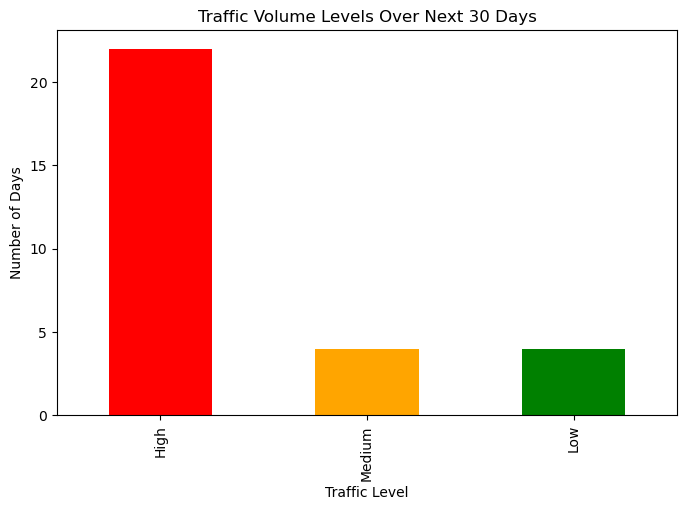

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
future_df['traffic_level'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Traffic Volume Levels Over Next 30 Days")
plt.xlabel("Traffic Level")
plt.ylabel("Number of Days")
plt.show()
